Topic 1: Fundamentals of DSA

Task 1

Execution Times (in seconds):
Bubble Sort: 0.18717
Merge Sort: 0.00400
Quick Sort: 0.00524


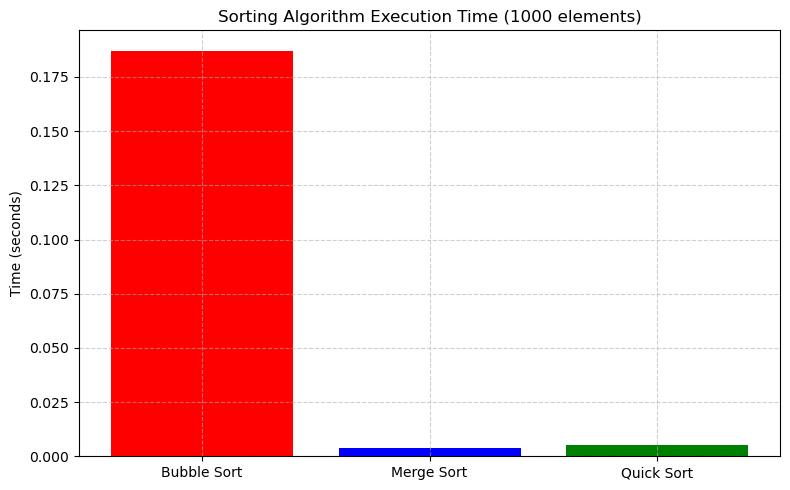

In [2]:
import random
import time
import matplotlib.pyplot as plt

# Bubble Sort - O(n^2)
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

# Merge Sort - O(n log n)
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]
        merge_sort(L)
        merge_sort(R)
        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Quick Sort - Average case O(n log n), Worst case O(n^2)
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = [x for x in arr[1:] if x <= pivot]
    right = [x for x in arr[1:] if x > pivot]
    return quick_sort(left) + [pivot] + quick_sort(right)

# Generate random list
arr = [random.randint(1, 10000) for _ in range(1000)]

# Copy arrays for each sort
arr1 = arr[:]
arr2 = arr[:]
arr3 = arr[:]

# Measure execution time
times = {}

start = time.time()
bubble_sort(arr1)
times["Bubble Sort"] = time.time() - start

start = time.time()
merge_sort(arr2)
times["Merge Sort"] = time.time() - start

start = time.time()
arr3 = quick_sort(arr3)
times["Quick Sort"] = time.time() - start

# Output times
print("Execution Times (in seconds):")
for k, v in times.items():
    print(f"{k}: {v:.5f}")

# Plotting execution times
plt.figure(figsize=(8, 5))
plt.bar(times.keys(), times.values(), color=['red', 'blue', 'green'])
plt.title("Sorting Algorithm Execution Time (1000 elements)")
plt.ylabel("Time (seconds)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Task 2

In [4]:
import time
from functools import lru_cache

# Recursive approach (exponential time)
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n - 1) + fib_recursive(n - 2)

# Iterative approach (linear time)
def fib_iterative(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b

# Memoized recursive (dynamic programming)
@lru_cache(maxsize=None)
def fib_memoized(n):
    if n <= 1:
        return n
    return fib_memoized(n - 1) + fib_memoized(n - 2)

# Execution and comparison
test_values = [10, 20, 30, 40]
print("n\tRecursive\tIterative\tMemoized")

for n in test_values:
    # Recursive
    start = time.time()
    fib_recursive(n)
    rec_time = time.time() - start

    # Iterative
    start = time.time()
    fib_iterative(n)
    iter_time = time.time() - start

    # Memoized
    start = time.time()
    fib_memoized(n)
    memo_time = time.time() - start

    print(f"{n}\t{rec_time:.6f}s\t{iter_time:.6f}s\t{memo_time:.6f}s")


n	Recursive	Iterative	Memoized
10	0.000000s	0.000000s	0.000000s
20	0.004825s	0.000000s	0.000000s
30	0.790087s	0.000000s	0.000000s
40	67.639293s	0.000000s	0.000000s


Task 3

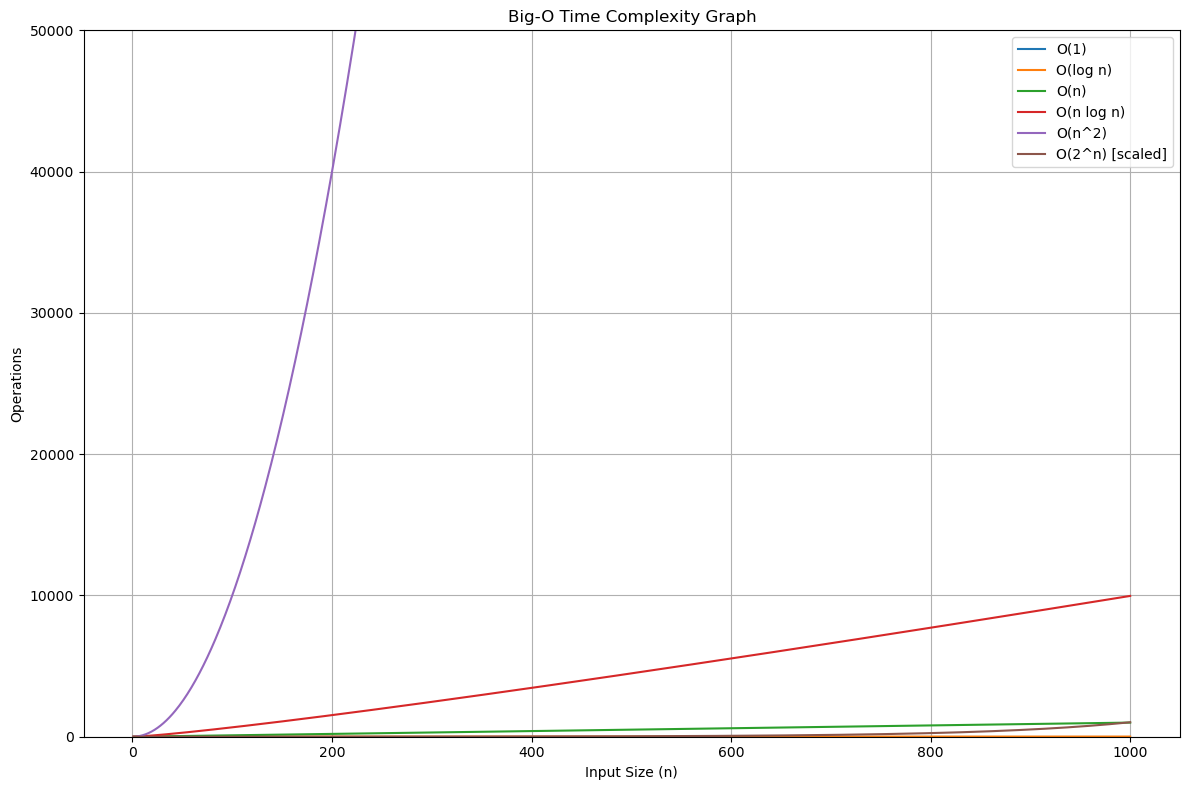

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Input sizes
n = np.arange(1, 1001)

# Complexity functions
def constant(n): return np.ones_like(n)
def logarithmic(n): return np.log2(n)
def linear(n): return n
def linearithmic(n): return n * np.log2(n)
def quadratic(n): return n**2
def exponential(n): return 2**(n / 100)  # Scaled for visibility

# Calculate values
O_1 = constant(n)
O_log_n = logarithmic(n)
O_n = linear(n)
O_n_log_n = linearithmic(n)
O_n2 = quadratic(n)
O_2n = exponential(n)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(n, O_1, label="O(1)")
plt.plot(n, O_log_n, label="O(log n)")
plt.plot(n, O_n, label="O(n)")
plt.plot(n, O_n_log_n, label="O(n log n)")
plt.plot(n, O_n2, label="O(n^2)")
plt.plot(n, O_2n, label="O(2^n) [scaled]")

plt.title("Big-O Time Complexity Graph")
plt.xlabel("Input Size (n)")
plt.ylabel("Operations")
plt.ylim(0, 50000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
